<a href="https://colab.research.google.com/github/Fadhilt4b/UTS/blob/main/Kelompok3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report

In [72]:
# input data
data = pd.read_csv('IoTPond9.csv')

In [73]:
# Cek kolom pada DataFrame
print(data.columns)

Index(['created_at', 'DATE', 'entry_id', 'Temperature(C)', 'Turbidity(NTU)',
       'Dissolved Oxygen(g/ml)', 'PH', 'Ammonia(g/ml)', 'Nitrate(g/ml)',
       'Fish_length(cm)', 'Fish_weight(g)'],
      dtype='object')


In [74]:
# menghapus kolom 'entry_id' pada dataframe
data = data.drop(['entry_id'], axis=1)

print(data)

                     created_at        DATE  Temperature(C)  Turbidity(NTU)  \
0       2021-06-18 12:11:39 CET  18-06-2021           27.70              97   
1       2021-06-18 12:12:08 CET  18-06-2021           27.70              97   
2       2021-06-18 12:12:28 CET  18-06-2021           27.70              96   
3       2021-06-18 12:12:48 CET  18-06-2021           27.00              45   
4       2021-06-18 12:13:07 CET  18-06-2021           27.00              45   
...                         ...         ...             ...             ...   
151780  2021-10-13 04:35:52 CET  13-10-2021           25.25             -10   
151781  2021-10-13 04:36:11 CET  13-10-2021           25.25             -10   
151782  2021-10-13 04:36:31 CET  13-10-2021           25.25             -10   
151783  2021-10-13 04:36:51 CET  13-10-2021           25.25             -10   
151784  2021-10-13 04:37:10 CET  13-10-2021           25.25             -10   

        Dissolved Oxygen(g/ml)       PH  Ammonia(g/

In [75]:
data.describe()

,Temperature(C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Fish_length(cm),Fish_weight(g)
count,151785.000000,151785.000000,151785.000000,151785.000000,1.517850e+05,151785.000000,151785.000000,151785.000000
mean,24.196939,33.068432,14.385698,6.178923,1.618054e+07,568.741358,22.474962,171.760342
std,0.960317,49.967241,13.266113,1.856972,2.134729e+09,509.815251,10.365418,162.824129
min,-127.000000,-57.000000,0.007000,2.110170,1.000000e-04,0.000000,6.947143,4.371429
25%,23.625000,-10.000000,4.621000,4.003130,2.068200e-01,113.000000,13.362857,27.771429
50%,24.125000,10.000000,8.634000,7.244310,5.549500e-01,160.000000,17.045714,49.000000
75%,24.687500,91.000000,20.547000,7.462200,1.143020e+00,1074.000000,33.862857,354.285714
max,27.700000,100.000000,44.980000,15.451660,4.270000e+11,2269.000000,36.154286,431.200000


In [76]:
data.isnull().sum()/len(data)

created_at                0.0
DATE                      0.0
Temperature(C)            0.0
Turbidity(NTU)            0.0
Dissolved Oxygen(g/ml)    0.0
PH                        0.0
Ammonia(g/ml)             0.0
Nitrate(g/ml)             0.0
Fish_length(cm)           0.0
Fish_weight(g)            0.0
dtype: float64

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151785 entries, 0 to 151784
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              151785 non-null  object 
 1   DATE                    151785 non-null  object 
 2   Temperature(C)          151785 non-null  float64
 3   Turbidity(NTU)          151785 non-null  int64  
 4   Dissolved Oxygen(g/ml)  151785 non-null  float64
 5   PH                      151785 non-null  float64
 6   Ammonia(g/ml)           151785 non-null  float64
 7   Nitrate(g/ml)           151785 non-null  int64  
 8   Fish_length(cm)         151785 non-null  float64
 9   Fish_weight(g)          151785 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 11.6+ MB


In [78]:
# Ubah data "created_at" menjadi datetime
data['created_at'] = pd.to_datetime(data['created_at'])

# Set kolom 'created_at' sebagai indeks DataFrame
data.set_index('created_at', inplace=True)

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


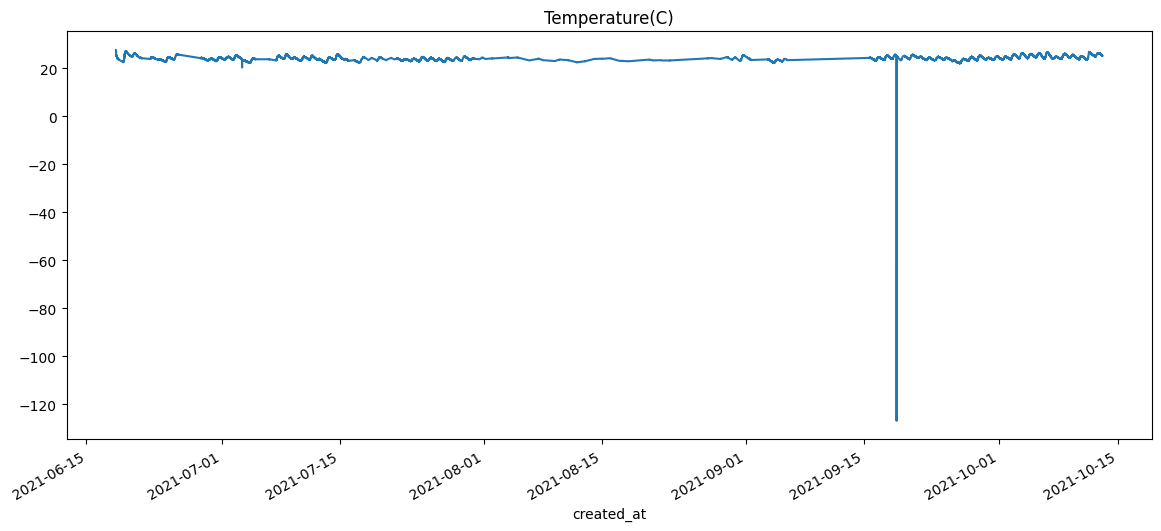

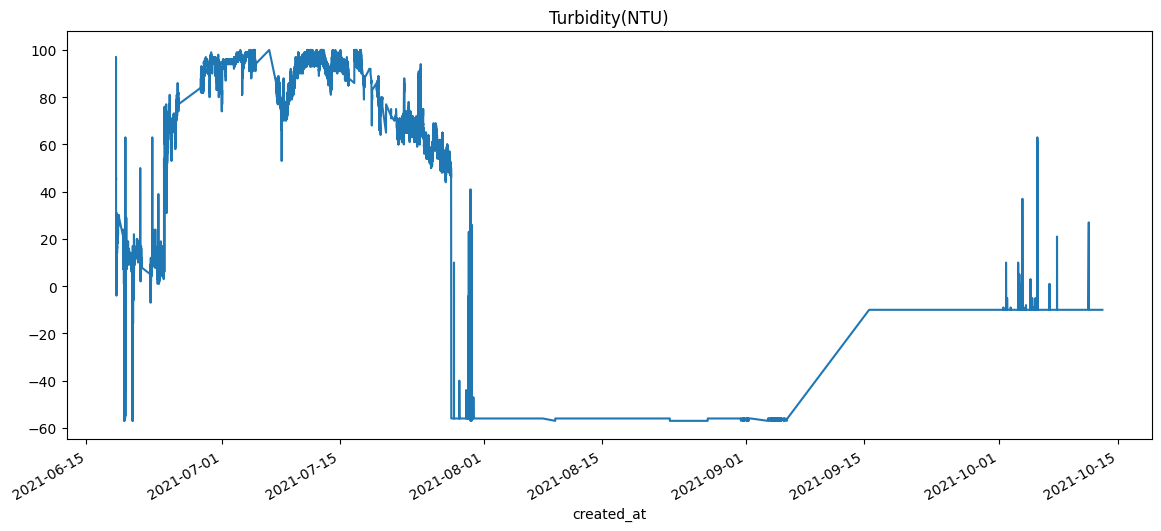

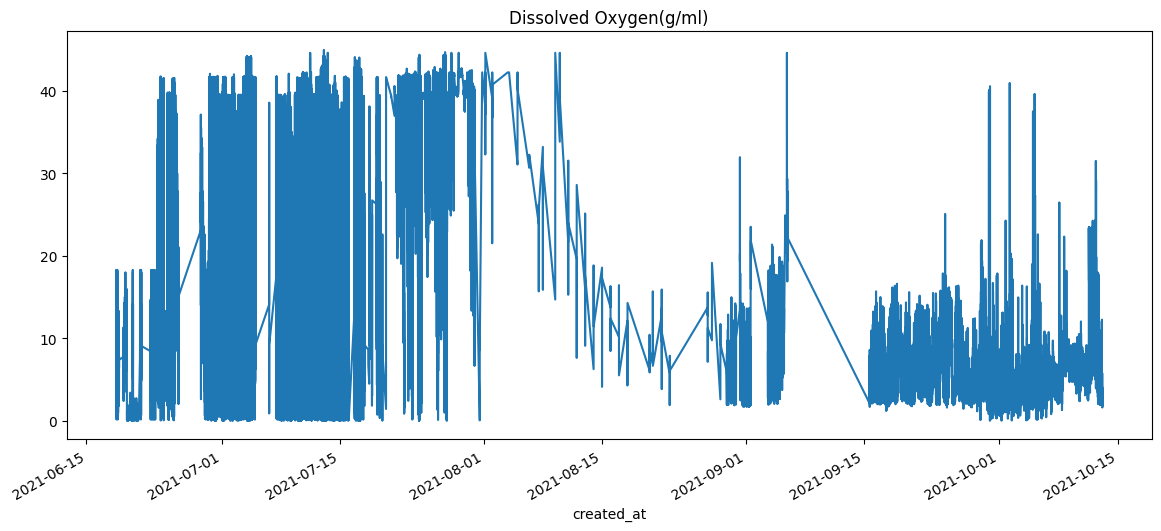

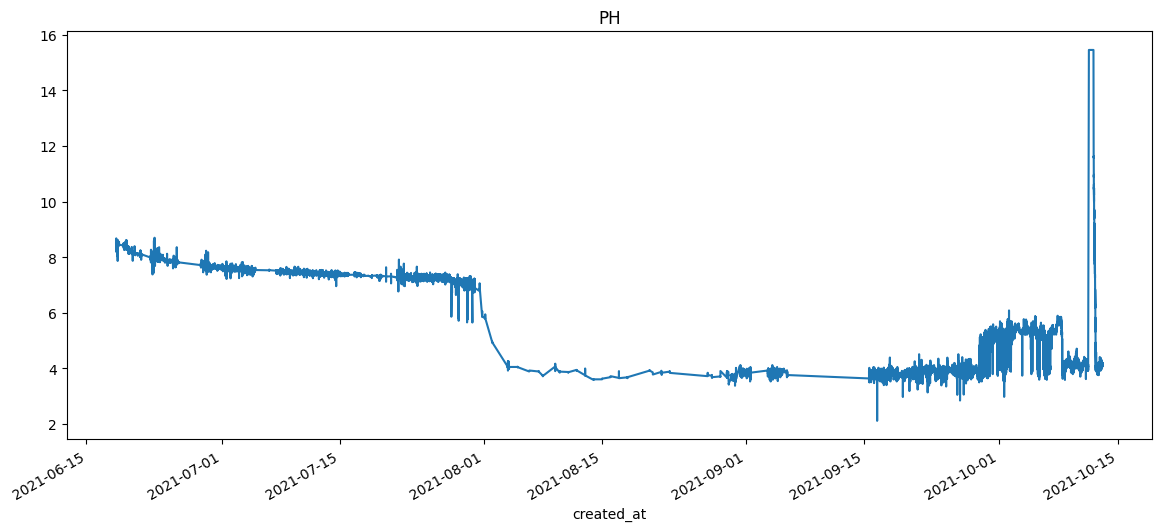

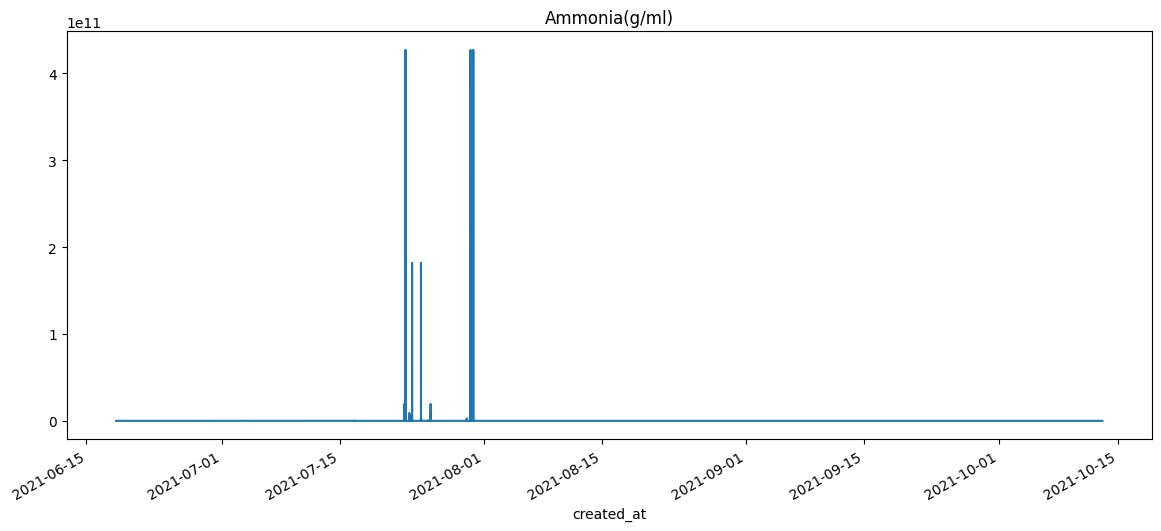

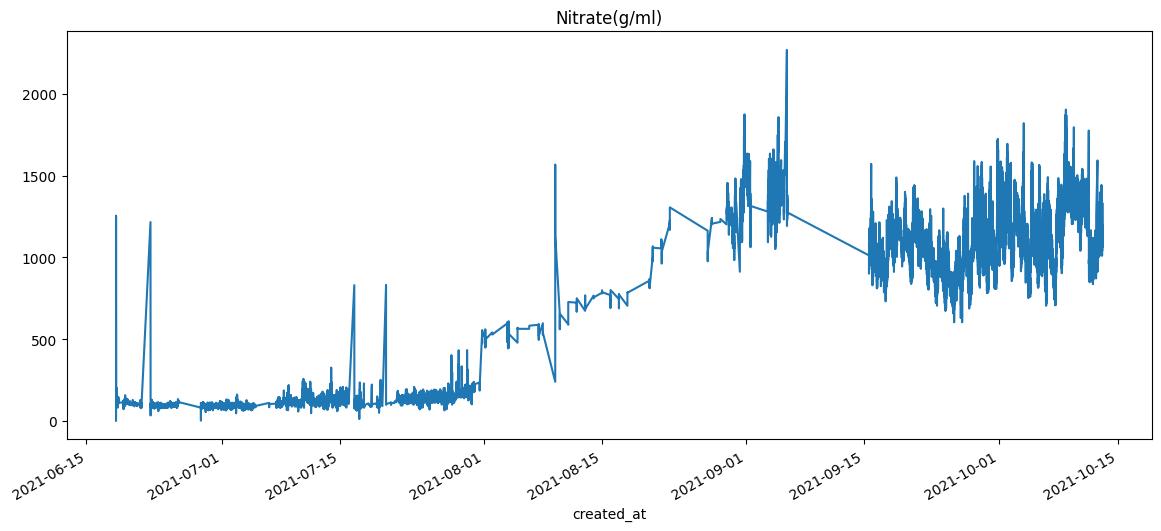

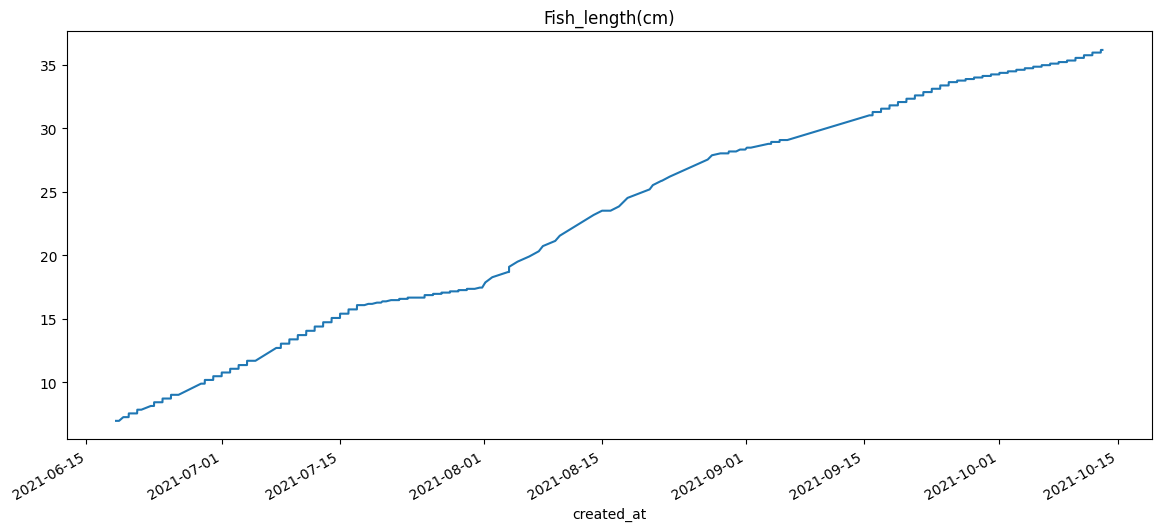

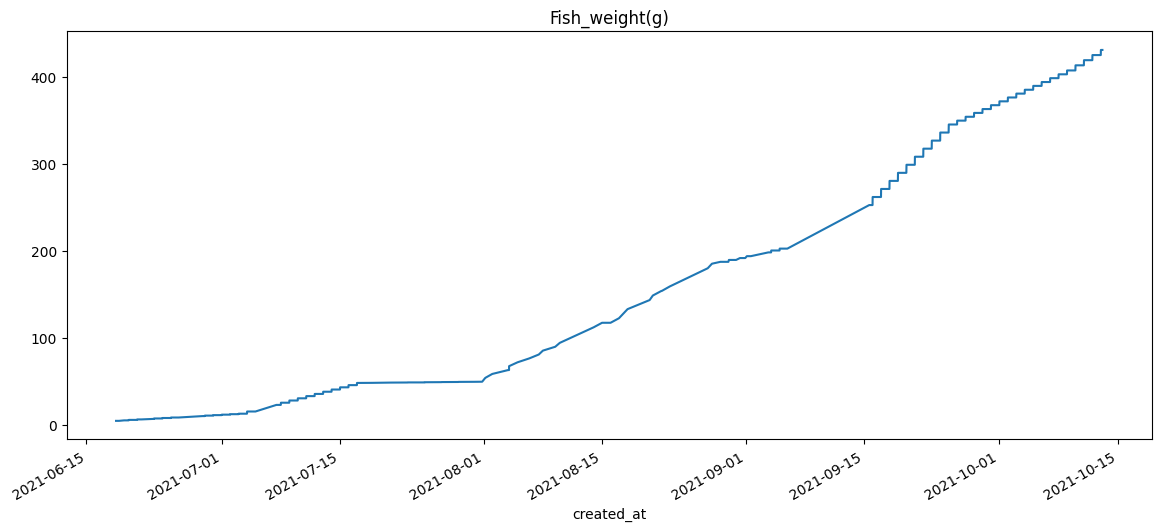

In [79]:
# plot data
import matplotlib.pyplot as plt

for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:  # Pastikan hanya plot kolom numerik
        plt.figure(figsize=(14, 6))
        data[column].plot()
        plt.title(column)
        plt.show()


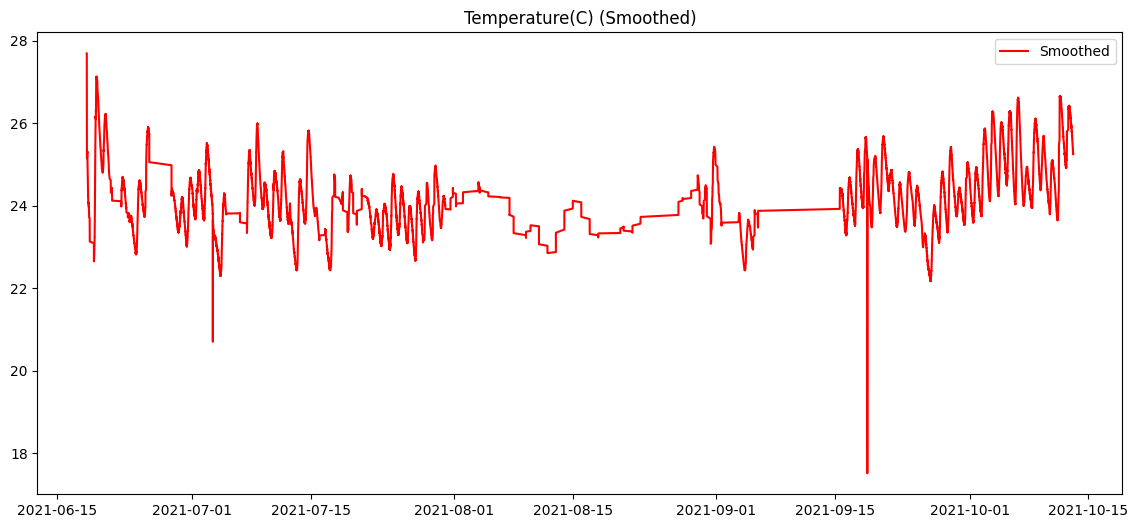

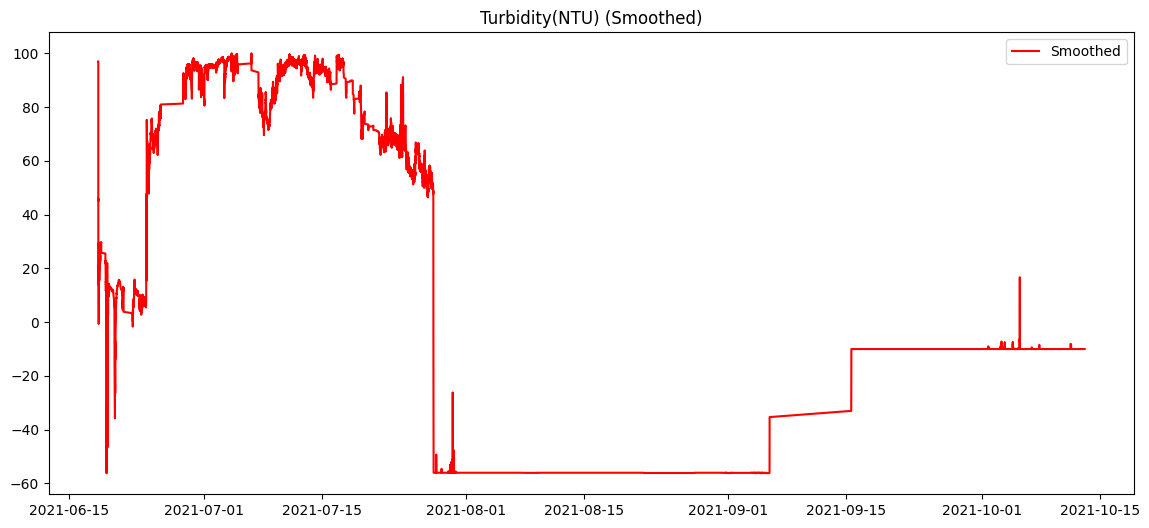

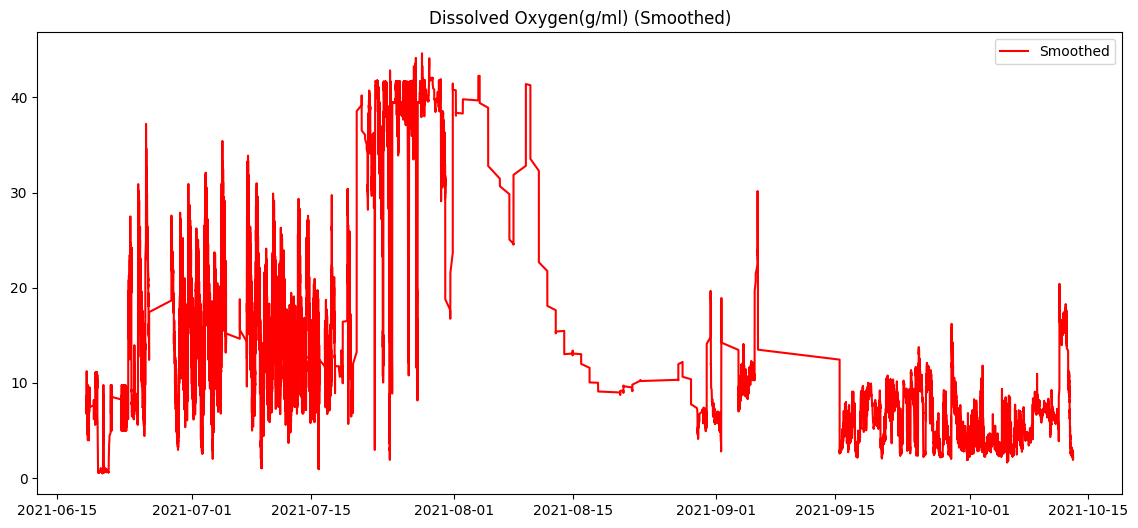

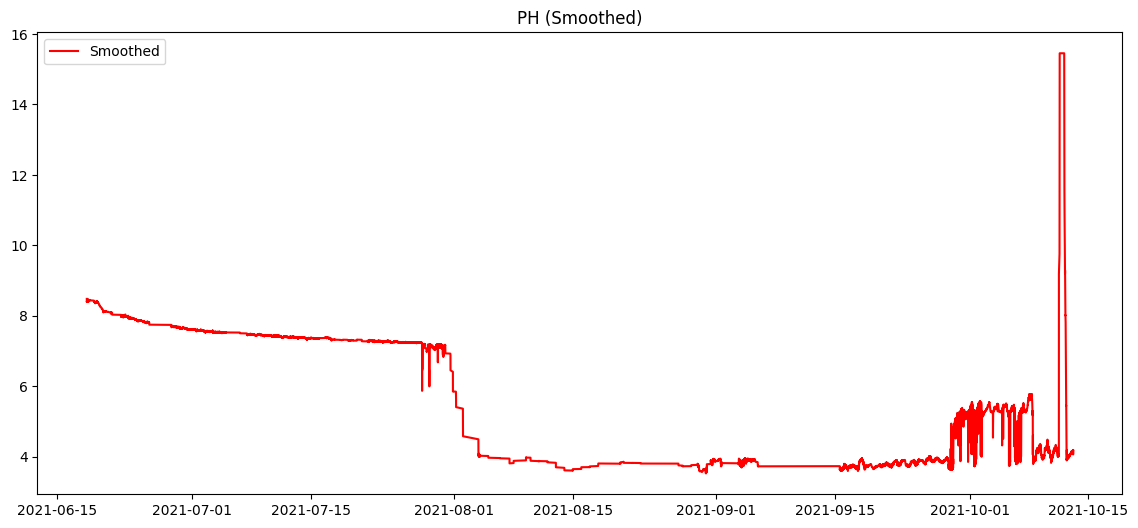

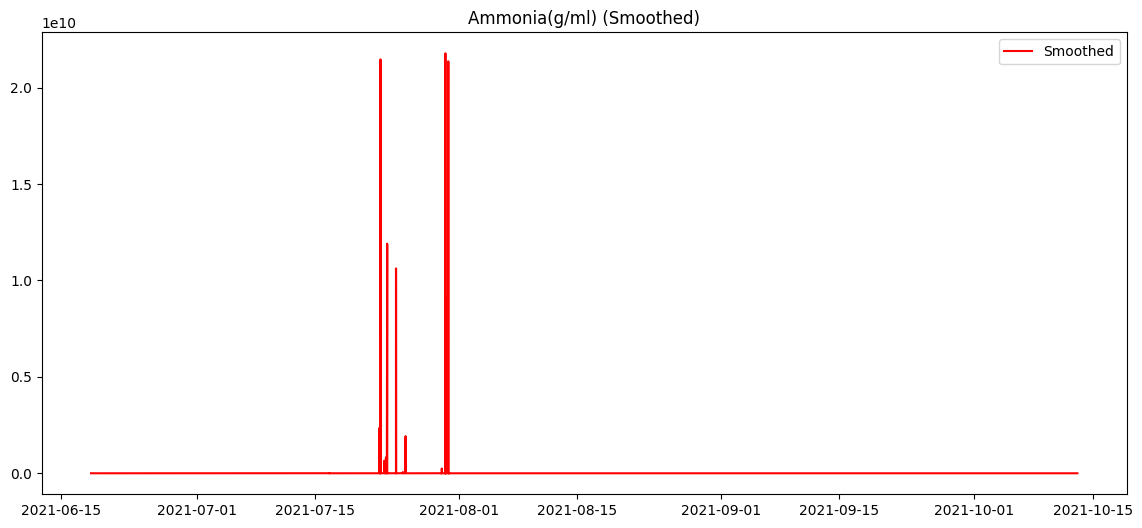

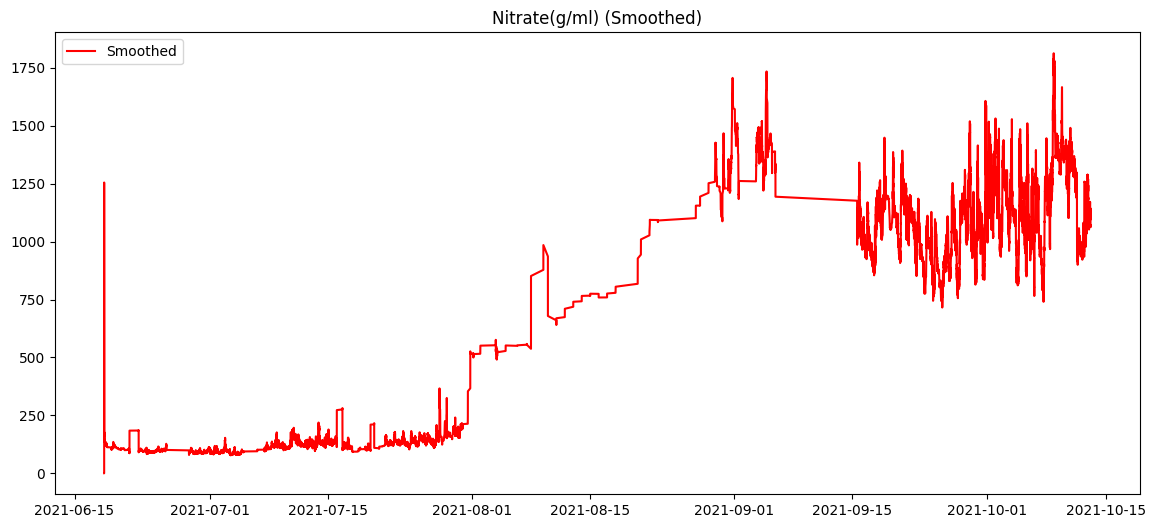

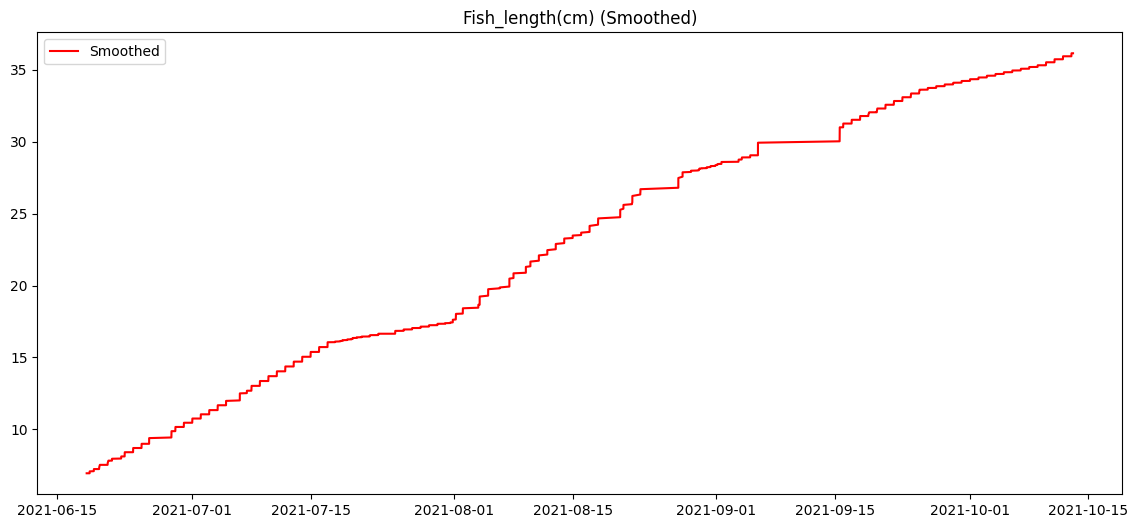

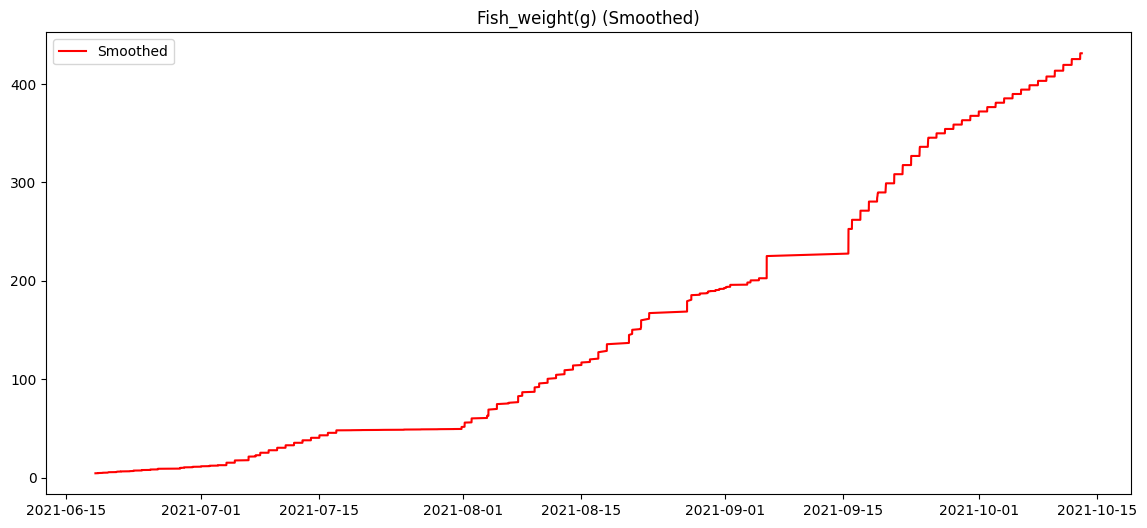

In [80]:
# plot data yang lebih smooth
import matplotlib.pyplot as plt

# Fungsi untuk membuat moving average dengan mean
def moving_average_mean(data, window_size):
    smoothed_data = data.copy()
    for i in range(window_size, len(data) - window_size):
        smoothed_data[i] = data[i - window_size:i + window_size].mean()
    return smoothed_data

# Plot smooth data
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:  # Pastikan hanya plot kolom numerik
        plt.figure(figsize=(14, 6))
        window_size = 10  # Sesuaikan ukuran jendela sesuai kebutuhan
        smooth_data = moving_average_mean(data[column], window_size)
        plt.plot(smooth_data, color='red', label='Smoothed')
        plt.title(column + ' (Smoothed)')
        plt.legend()
        plt.show()


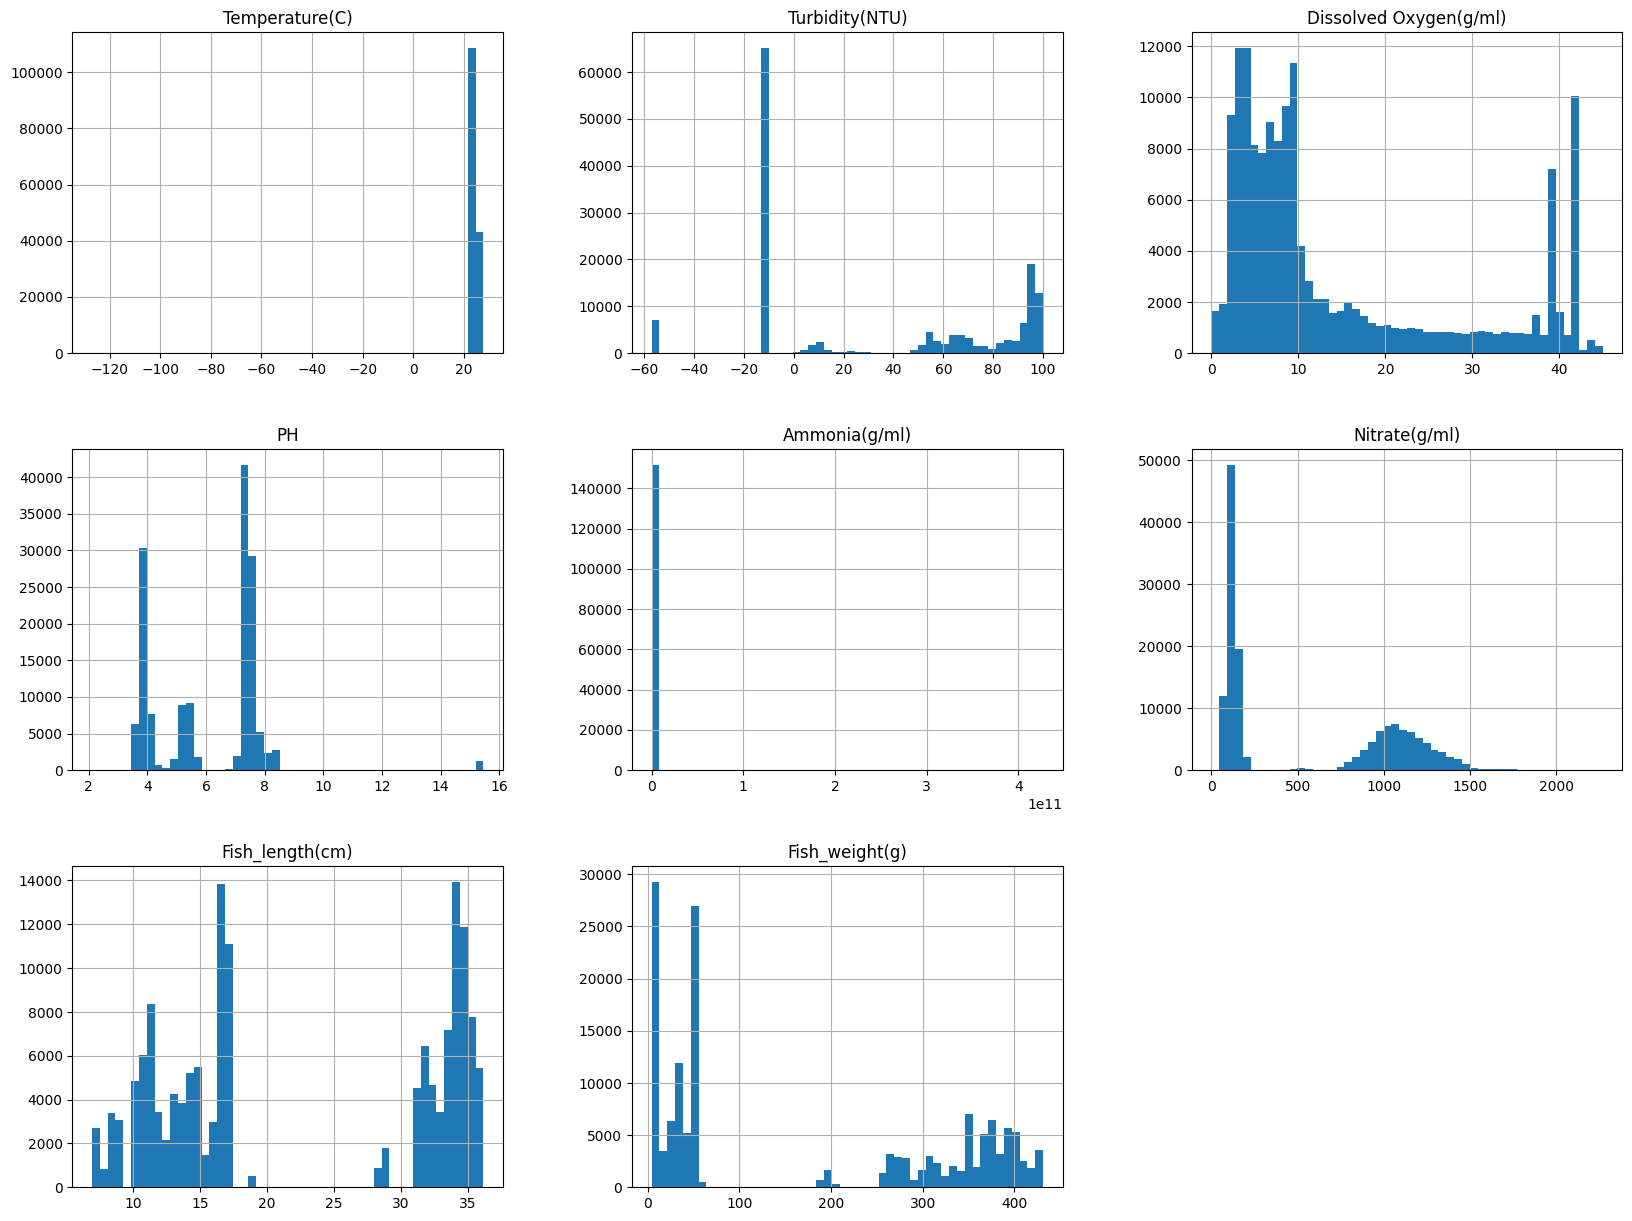

In [81]:
# plot histogram data
data.hist(bins=50,figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

<ipython-input-82-6e00e07c0e3c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data[data.columns[0:13].tolist()].corr(), annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0)


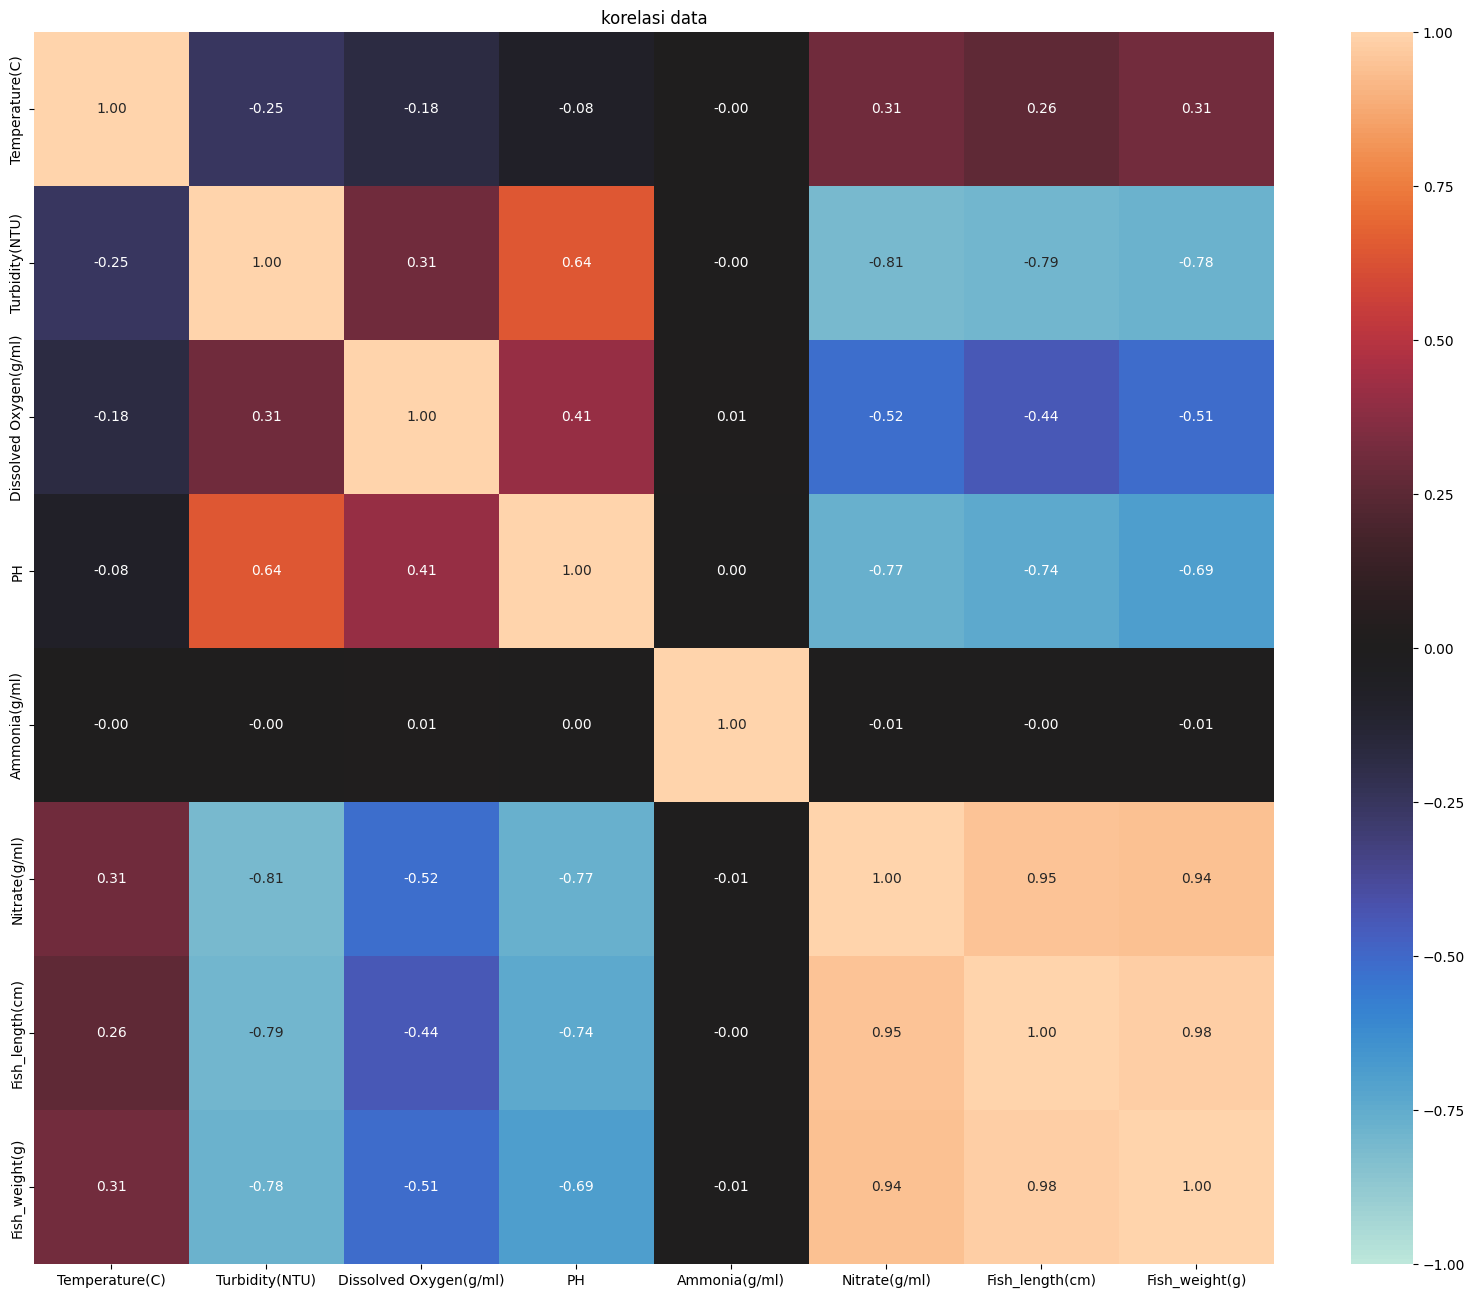

In [82]:
# korelasi data
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
fig = plt.subplots(figsize=(20, 16))
sns.heatmap(data[data.columns[0:13].tolist()].corr(), annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0)
plt.title('korelasi data', fontsize=12)
plt.show()

In [83]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [84]:
# Ubah kolom 'DATE' menjadi tipe data datetime
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Tanggal awal yang diberikan
start_date = pd.to_datetime('2021-06-18')

# Ubah kolom 'DATE' menjadi tipe data datetime
X['DATE'] = pd.to_datetime(X['DATE'])

# Hitung selisih dalam hari antara setiap tanggal dan tanggal awal
X['days_since_start'] = (X['DATE'] - start_date).dt.days



<ipython-input-84-747841a7f11e>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  X['DATE'] = pd.to_datetime(X['DATE'])


In [98]:
# Model Regresi Linear
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler


# Lakukan penskalaan fitur
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi dan latih model regresi linear
lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)

# Lakukan prediksi pada data pengujian
y_pred = lreg.predict(X_test_scaled)

# Evaluasi kinerja model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print('Train score:', lreg.score(X_train_scaled, y_train))
print('Test score:', lreg.score(X_test_scaled, y_test))


Mean Squared Error: 617.5201844743895
Train score: 0.9779558868666123
Test score: 0.9766946845287974


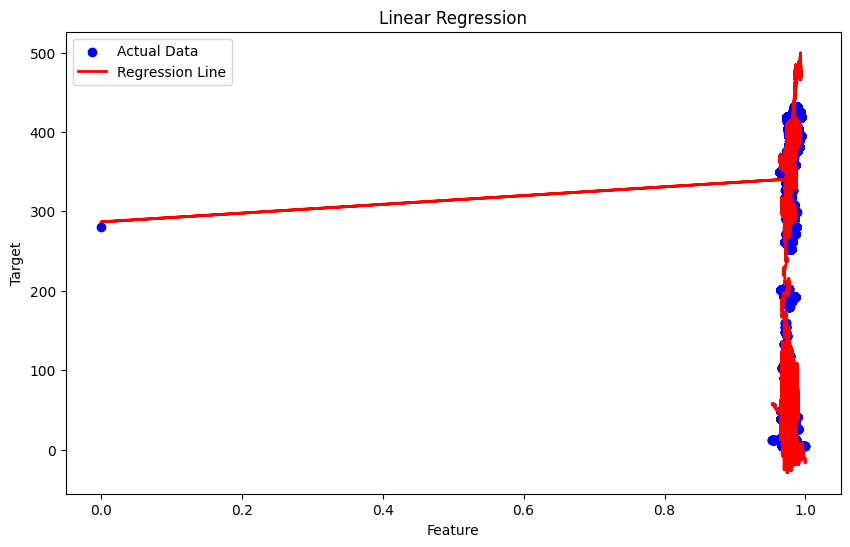

In [99]:
# Akurasi Linear Regresion
from sklearn.linear_model import LinearRegression

# Inisialisasi model regresi linear
lreg = LinearRegression()

# Melatih model pada data pelatihan
lreg.fit(X_train_scaled, y_train)

import matplotlib.pyplot as plt

# Membuat prediksi menggunakan model regresi linear
predictions = lreg.predict(X_scaled)

# Plot data aktual
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], y, color='blue', label='Actual Data')

# Plot garis regresi
plt.plot(X_scaled[:, 0], predictions, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [100]:
# Menampilkan koefisien
print("Koefisien:")
print(lreg.coef_)

# Menampilkan intersep
print("Intersep:")
print(lreg.intercept_)

Koefisien:
[ 57.92813487  -7.38947484 -50.58468241 104.92403681 -23.95262619
  36.30824387 434.47181371 -15.73179663]
Intersep:
-96.87136005056621


In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Inisialisasi model regresi linear
lreg = LinearRegression()

# Lakukan cross-validation dengan 5 fold
scores = cross_val_score(lreg, X_scaled, y, cv=5)

# Tampilkan skor dari setiap fold
print("Cross-validation scores:", scores)

# Tampilkan rata-rata skor dari semua fold
print("Average cross-validation score:", scores.mean())


Cross-validation scores: [-7.76195730e+02 -1.01357860e+01  4.66016085e-01  1.56536116e-01
 -3.33754589e+00]
Average cross-validation score: -157.80930193821285


Epoch 1/50
3036/3036 [==============================] - 9s 3ms/step - loss: 19453.3652 - val_loss: 2009.0393
Epoch 2/50
3036/3036 [==============================] - 5s 2ms/step - loss: 1399.1251 - val_loss: 984.7588
Epoch 3/50
3036/3036 [==============================] - 6s 2ms/step - loss: 739.8647 - val_loss: 598.6876
Epoch 4/50
3036/3036 [==============================] - 5s 2ms/step - loss: 517.4963 - val_loss: 480.5955
Epoch 5/50
3036/3036 [==============================] - 6s 2ms/step - loss: 447.0003 - val_loss: 434.0063
Epoch 6/50
3036/3036 [==============================] - 5s 2ms/step - loss: 411.7408 - val_loss: 404.7895
Epoch 7/50
3036/3036 [==============================] - 6s 2ms/step - loss: 387.1882 - val_loss: 383.0493
Epoch 8/50
3036/3036 [==============================] - 5s 2ms/step - loss: 367.8906 - val_loss: 364.6152
Epoch 9/50
3036/3036 [==============================] - 5s 2ms/step - loss: 351.4100 - val_loss: 348.9365
Epoch 10/50
3036/3036 [===================

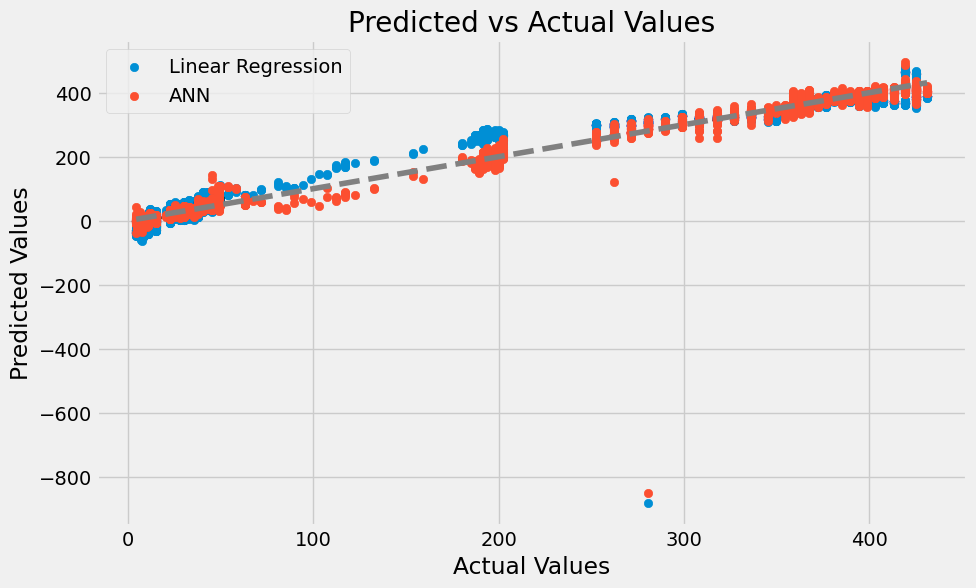

In [150]:
# Metode ANN
# Kemudian bandingkan dengan Linear Regresion
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lakukan penskalaan fitur
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi dan latih model regresi linear
lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)

# Melakukan prediksi dengan model regresi linear
y_pred_lr = lreg.predict(X_test_scaled)

# Inisialisasi model ANN
ann = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(1, activation='linear')
])

# Kompilasi model ANN
ann.compile(optimizer='adam', loss='mean_squared_error')

# Latih model ANN
history = ann.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

# Melakukan prediksi dengan model ANN
y_pred_ann = ann.predict(X_test_scaled).flatten()

# Evaluasi kinerja Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Evaluasi kinerja ANN
mse_ann = mean_squared_error(y_test, y_pred_ann)

# Classification Performance: MSE
print('Mean Squared Error (Linear Regression):', mse_lr)
print('Mean Squared Error (ANN):', mse_ann)

# Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression')
plt.scatter(y_test, y_pred_ann, label='ANN')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()


In [160]:
# Clasification Report
print(classification_report(y_test > 0.5, y_pred_binary))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.87      0.93     30357

    accuracy                           0.87     30357
   macro avg       0.50      0.43      0.46     30357
weighted avg       1.00      0.87      0.93     30357



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [176]:
# Perbandingan kedua metode
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluasi model regresi linear
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print("Mean Squared Error:", mse_lr)
print("Mean Absolute Error:", mae_lr)
print("R-squared (R^2) Score:", r2_lr*100, "%")

# Evaluasi model ANN
mse_ann = mean_squared_error(y_test, y_pred_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print("\nANN:")
print("Mean Squared Error:", mse_ann)
print("Mean Absolute Error:", mae_ann)
print("R-squared (R^2) Score:", r2_ann*100,"%")


Linear Regression:
Mean Squared Error: 617.5201844743895
Mean Absolute Error: 18.95440765690179
R-squared (R^2) Score: 97.66946845287974 %

ANN:
Mean Squared Error: 128.41092739938193
Mean Absolute Error: 6.5580385622758826
R-squared (R^2) Score: 99.5153750034034 %


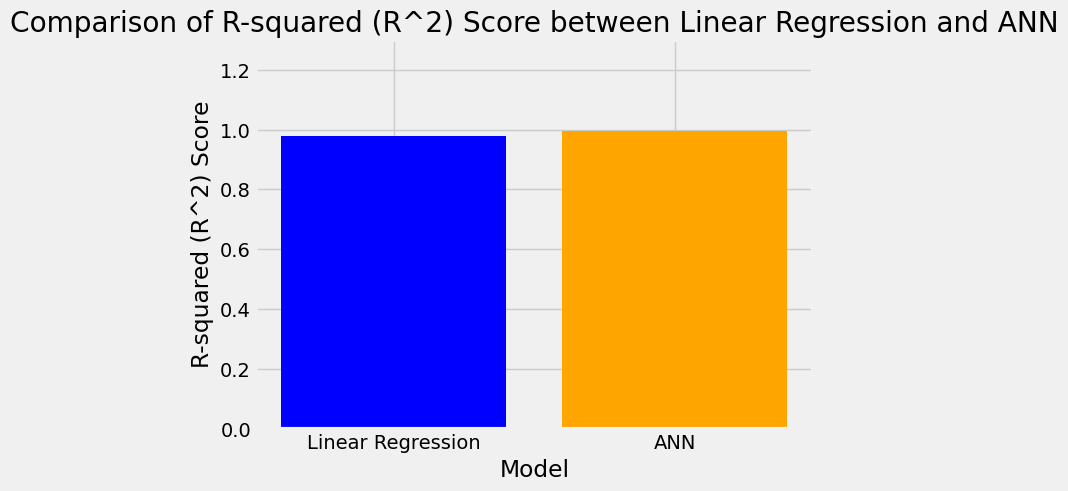

In [183]:
# Perbandigan Linear Regresion vs ANN
import matplotlib.pyplot as plt

# Plot R-squared (R^2) score
plt.bar(['Linear Regression', 'ANN'], [r2_lr, r2_ann], color=['blue', 'orange'])
plt.ylim(0, 1.3)  # Set batas sumbu y
plt.xlabel('Model')
plt.ylabel('R-squared (R^2) Score')
plt.title('Comparison of R-squared (R^2) Score between Linear Regression and ANN')
plt.show()


In [184]:
from sklearn.metrics import classification_report

# Tampilkan classification report dengan penanganan peringatan zero division
print("Classification Report:")
print(classification_report(y_test > 0.5, y_pred_binary, zero_division='warn'))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.87      0.93     30357

    accuracy                           0.87     30357
   macro avg       0.50      0.43      0.46     30357
weighted avg       1.00      0.87      0.93     30357



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
